Problem 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# iris 데이터셋을 불러옴
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.columns = ['sl', 'sw', 'pl', 'pw', 'name']

# 'sl', 'sw', 'pl', 'pw'로 만들 수 있는 6가지 조합 생성
X1 = iris.loc[50:149, ['sl', 'sw']]
X2 = iris.loc[50:149, ['sl', 'pl']]
X3 = iris.loc[50:149, ['sl', 'pw']]
X4 = iris.loc[50:149, ['sw', 'pl']]
X5 = iris.loc[50:149, ['sw', 'pw']]
X6 = iris.loc[50:149, ['pl', 'pw']]

# 각 조합의 feature를 numpy array로 변환
X_list = [X1, X2, X3, X4, X5, X6]
for i in range(len(X_list)):
  X_list[i] = X_list[i].to_numpy()

combination_list = ['sl, sw', 'sl, pl', 'sl, pw', 'sw, pl', 'sw, pw', 'pl, pw']

# versicolor와 virginica 품종 데이터 100개로 진행
T = iris.loc[50:149, 'name']
T = T.to_numpy()
T = np.where(T == 'Iris-versicolor', 1, 0)

# 반복가능성을 위해 시드 생성 (42는 아무 의미 없는 숫자)
np.random.seed(42)

# 데이터를 무작위로 train과 test로 나눔 (test 데이터는 100개 중 20개)
indices = np.random.permutation(len(X1))
test_size = int(0.2 * len(X1))

X_train_list = []
X_test_list = []
for i in range(len(X_list)):
  X_train = X_list[i][indices[:-test_size]]
  X_test = X_list[i][indices[-test_size:]]
  X_train_list.append(X_train)
  X_test_list.append(X_test)

T_train = T[indices[:-test_size]]
T_test = T[indices[-test_size:]]

# Trial 300번, learning rate 0.01 설정
n_trials = 300
alpha = 0.01

# 초기 weight를 설정하고 hit rate plotting을 위한 빈 리스트 생성
W_list = [np.random.randn(3) for _ in range(len(X_list))]
hit_rate=[]

# step function 정의
def step_func (threshold, x):
  if x < threshold:
    return 0
  else:
    return 1

In [ ]:
# train input 활용하여 각 combination을 train
accuracy_rates = []
for i in range(len(X_list)):
  W = W_list[i]
  X_train = X_train_list[i]
  X_test = X_test_list[i]
  for trial in range(n_trials):
    for j in range(len(X_train)):
      s = np.dot(X_train[j], W[1:].reshape(-1,1)) + W[0]
      delta = alpha * (T_train[j] - step_func(0, s))
      W[1:] += delta * X_train[j]
      W[0] += delta

    # test accuracy 계산
    correct = 0
    for j in range(len(X_test)):
      s = np.dot(X_test[j], W[1:].reshape(-1,1)) + W[0]
      if step_func(0, s) == T_test[j]:
        correct += 1
    accuracy_rate = correct / len(X_test)
    accuracy_rates.append(accuracy_rate)

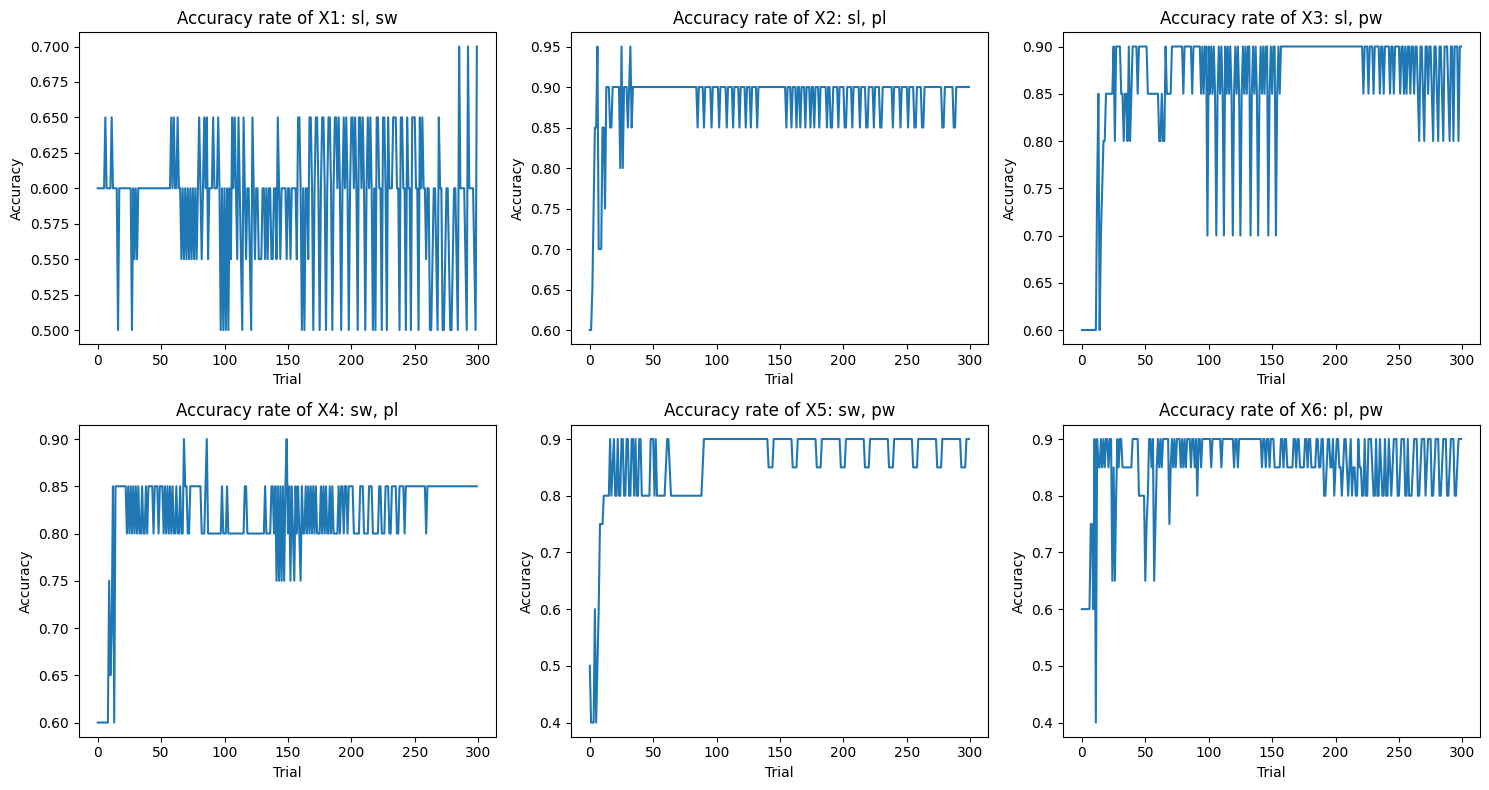

In [ ]:
# iteration에 따른 accuracy rate 그래프
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.plot(accuracy_rates[i*n_trials:(i+1)*n_trials])
    ax.set_title(f"Accuracy rate of X{i+1}: {combination_list[i]}")
    ax.set_xlabel("Trial")
    ax.set_ylabel("Accuracy")
plt.tight_layout()
plt.show()

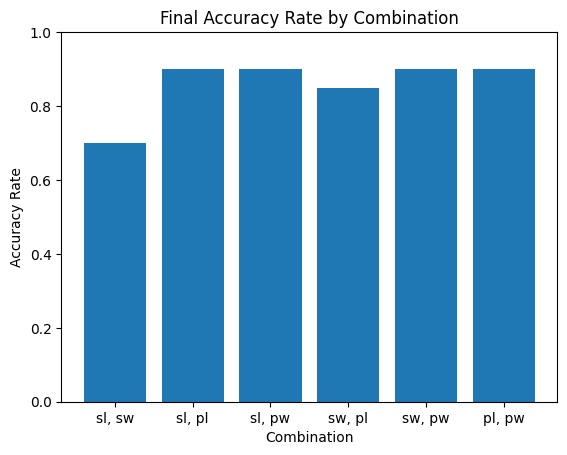

In [ ]:
# 각 combination의 마지막 accuracy rate 구하기
final_accuracy_rates = []
for i in range(len(X_list)):
  final_accuracy_rate = accuracy_rates[(i+1)*n_trials-1]
  final_accuracy_rates.append(final_accuracy_rate)

# combination에 따른 최종 accuracy rate 그래프
plt.bar(combination_list, final_accuracy_rates)
plt.title("Final Accuracy Rate by Combination")
plt.xlabel("Combination")
plt.ylabel("Accuracy Rate")
plt.ylim(0, 1)
plt.show()

# sl, sw를 사용하면 예측력이 가장 떨어지는 것을 알 수 있음

Problem 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
            
class Perceptron:
    
  def __init__(self, input_size, hidden_size, output_size, alpha):
    self.i = input_size
    self.h = hidden_size
    self.o = output_size
    self.a = alpha
    
    # W1은 input -> hidden node에서의 weight/ W2는 hidden -> output node에서의 weight
    self.W1 = np.random.randn(input_size, hidden_size)
    self.W2 = np.random.randn(hidden_size, output_size)
        
  # Activation function으로 sigmoid 사용
  def step_func(self, x):
    return 1 / (1 + np.exp(-x))
        
  # 훈련 과정
  def train(self, inputs, target):
    I = np.array(inputs, ndmin=2)
    T = np.array(target, ndmin=2)
                
    # forward propagation
    layer1 = np.dot(I, self.W1)
    L1 = self.step_func(layer1)
    output = np.dot(L1, self.W2)
    O = self.step_func(output)
        
    # 에러 값을 각각 계산
    delta = T - O
    hdelta = np.dot(delta, self.W2.T)
    
    # back propagation - W, bias 조정
    self.W2 += self.a*np.dot(L1.T, delta * O * (1-O))
    self.W1 += self.a*np.dot(I.T, hdelta * L1 * (1-L1))
                
  def test(self, inputs):
    I = np.array(inputs, ndmin=2)
    
    # forward propagation
    layer1 = np.dot(I, self.W1)
    L1 = self.step_func(layer1)
    output = np.dot(L1,self.W2)
    O = self.step_func(output)
    
    return O

In [2]:
# 데이터 불러오기
iris=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

# One-hot encoding으로 품종을 변환
temp = pd.get_dummies(iris[4])
temp.replace({1:0.99,0:0.01}, inplace = True)

# 넘파이 배열로 변환, min-mix scaling으로 0~1로 정규화
raw = iris.iloc[0:150,:4].to_numpy()
X_min = np.min(raw, axis=0)
X_max = np.max(raw, axis=0)
X = (raw - X_min) / (X_max - X_min)
T = temp.iloc[0:150,:3].to_numpy()

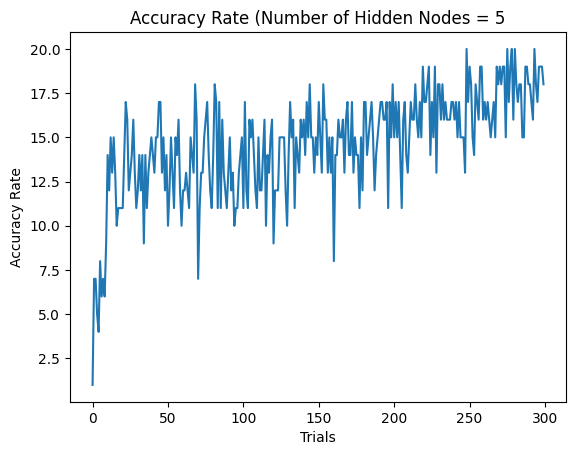

In [3]:
# 첫번째: hidden node 5개
n_trials = 300
n_test = 20
a = 0.01
i = 4
h = 5
o = 3
hit_array_5 = []
  
go = Perceptron(i, h, o, a)
accuracy_rates_5 = []

# '트레이닝 -> hit rate' 기록
for j in range(n_trials):
  for i in range (len(X)):
    go.train(X[i], T[i])
         
  hit = 0
  for i in range (n_test):
    s = np.random.randint(0,149)           
    if((np.argmax(T[s])) == (np.argmax(go.test(X[s])))):
      hit += 1
    
  hit_array_5.append(hit)
  accuracy_rate = hit / n_test
  accuracy_rates_5.append(accuracy_rate)
  
plt.plot(hit_array_5)
plt.title(f"Accuracy Rate (Number of Hidden Nodes = {h}")
plt.xlabel("Trials")
plt.ylabel("Accuracy Rate")
plt.show()

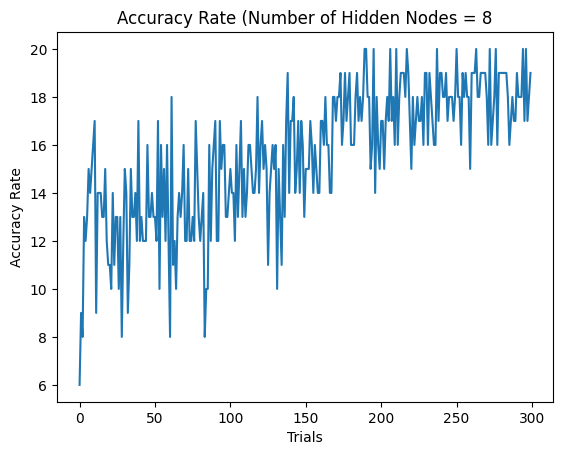

In [4]:
# 2번째: hidden node 8개
n_trials = 300
n_test = 20
a = 0.01
i = 4
h = 8
o = 3
hit_array_8 = []
  
go = Perceptron(i, h, o, a)
accuracy_rates_8 = []

# '트레이닝 -> hit rate' 기록
for j in range(n_trials):
  for i in range (len(X)):
    go.train(X[i], T[i])

        
  hit = 0
  for i in range (n_test):
    s = np.random.randint(0,149)           
    if((np.argmax(T[s])) == (np.argmax(go.test(X[s])))):
      hit += 1
    
  hit_array_8.append(hit)
  accuracy_rate = hit / n_test
  accuracy_rates_8.append(accuracy_rate)

plt.plot(hit_array_8)
plt.title(f"Accuracy Rate (Number of Hidden Nodes = {h}")
plt.xlabel("Trials")
plt.ylabel("Accuracy Rate")
plt.show()

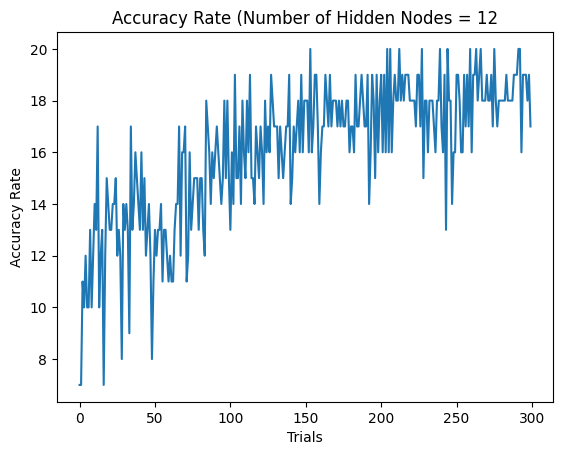

In [5]:
# 3번째: hidden node 12개
n_trials = 300
n_test = 20
a = 0.01
i = 4
h = 12
o = 3
hit_array_12 = []
  
go = Perceptron(i, h, o, a)
accuracy_rates_12 = []

# '트레이닝 -> hit rate' 기록
for j in range(n_trials):
  for i in range (len(X)):
    go.train(X[i], T[i])

  # state          
  hit=0
  for i in range (n_test):
    s = np.random.randint(0,149)           
    if((np.argmax(T[s])) == (np.argmax(go.test(X[s])))):
      hit += 1
    
  hit_array_12.append(hit)
  accuracy_rate = hit / n_test
  accuracy_rates_12.append(accuracy_rate)
   
plt.plot(hit_array_12)
plt.title(f"Accuracy Rate (Number of Hidden Nodes = {h}")
plt.xlabel("Trials")
plt.ylabel("Accuracy Rate")
plt.show()

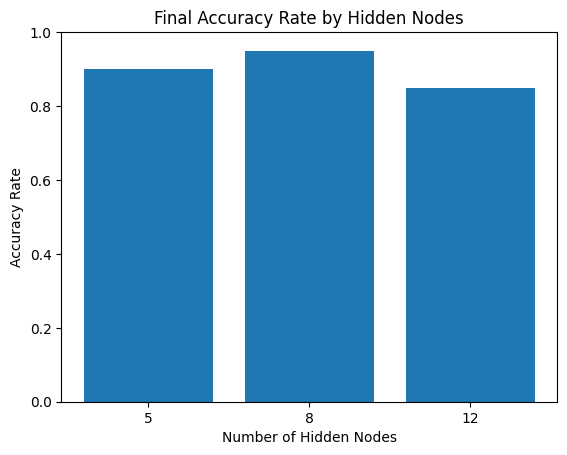

Final Accuracy Rate When Hidden Nodes = 5: 0.90
Final Accuracy Rate When Hidden Nodes = 8: 0.95
Final Accuracy Rate When Hidden Nodes = 12: 0.85


In [6]:
# node 개수를 달리한 시행마다 최종 accuracy rate 구하기
values = [accuracy_rates_5[n_trials-1], accuracy_rates_8[n_trials-1], accuracy_rates_12[n_trials-1]]
nodes = ['5', '8', '12']
plt.bar(nodes, values)
plt.title("Final Accuracy Rate by Hidden Nodes")
plt.xlabel("Number of Hidden Nodes")
plt.ylabel("Accuracy Rate")
plt.ylim(0, 1)
plt.show()

print(f"Final Accuracy Rate When Hidden Nodes = 5: {accuracy_rates_5[n_trials-1]:.2f}")
print(f"Final Accuracy Rate When Hidden Nodes = 8: {accuracy_rates_8[n_trials-1]:.2f}")
print(f"Final Accuracy Rate When Hidden Nodes = 12: {accuracy_rates_12[n_trials-1]:.2f}")

# 여러 번 반복 시행한 결과, 노드가 많을수록 대체로 최종 테스트 정확도가 높으나 그렇지 않은 경우도 다수 발생함을 알 수 있음.

Problem 3